In [1]:
#importing required libraries
import pandas as pd
import numpy as np

In [2]:
#importing the dataset
data = pd.read_csv('nyc_taxi_trip_duration Dataset.csv')

In [3]:
#first 5 rows oft the dataset
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
#no of rows and columns
data.shape

(729322, 11)

In [5]:
#dropping id and timestamp variables
new_data = data.drop(['id', 'pickup_datetime', 'dropoff_datetime', 'store_and_fwd_flag'], axis =1)
new_data.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,2,1,-73.953918,40.778873,-73.963875,40.771164,400
1,1,2,-73.988312,40.731743,-73.994751,40.694931,1100
2,2,2,-73.997314,40.721458,-73.948029,40.774918,1635
3,2,6,-73.961670,40.759720,-73.956779,40.780628,1141
4,1,1,-74.017120,40.708469,-73.988182,40.740631,848


In [6]:
#seggregating independent and dependent variiables
x = new_data.drop(['trip_duration'], axis = 1)
y = new_data['trip_duration']
x.shape, y.shape

((729322, 6), (729322,))

In [7]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [8]:
# converting array into dataframe
x = pd.DataFrame(x_scaled, columns = x.columns)
x.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,1.0,0.111111,0.856226,0.353352,0.856048,0.731696
1,0.0,0.222222,0.855612,0.350606,0.855497,0.725202
2,1.0,0.222222,0.855451,0.350007,0.856331,0.732015
3,1.0,0.666667,0.856087,0.352236,0.856174,0.732502
4,0.0,0.111111,0.855098,0.349251,0.855614,0.729095


In [9]:
#train_test_split
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x, y, random_state = 96)

In [10]:
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse

In [11]:
#instance of KNN
reg = KNN(n_neighbors = 5)

#fitting the model
reg.fit(x_train, y_train)

#predicting
test_predict = reg.predict(x_test)
k = mse(test_predict, y_test)

print("Test Mse", k)

Test Mse 13520260.44110941


In [12]:
def Elbow(K):
  #initiating empty list
    test_mse = []
  
  #training model for evey value of K
    for i in K:
        #Instance of KNN
        reg = KNN(n_neighbors = i)
        reg.fit(x_train, y_train)
        #Appending mse value to empty list claculated using the predictions
        tmp = reg.predict(x_test)
        tmp = mse(tmp,y_test)
        test_mse.append(tmp)
    
    return test_mse
    

In [13]:
#Defining K range
k = range(1,10)

In [14]:
# calling above defined function
test = Elbow(k)

In [16]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Elbow Curve for test')

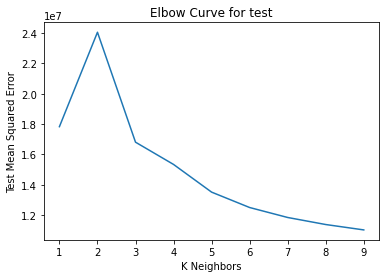

In [17]:
# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test Mean Squared Error')
plt.title('Elbow Curve for test')

In [18]:
# Creating instance of KNN
reg = KNN(n_neighbors = 9)
reg.fit(x_train, y_train)
pred1 = reg.predict(x_test)
KNN_score = reg.score(x_train, y_train)


# Linear Model with Regularisation

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression()
lr.fit(x_train, y_train)
train_score = lr.score(x_train, y_train)

In [21]:
test_score = lr.score(x_test, y_test)
test_score

In [23]:
from sklearn.linear_model import Lasso

In [24]:
reg = Lasso()
reg.fit(x_train, y_train)
pred2 = reg.predict(x_test)
reg_test = reg.score(x_test, y_test)

In [25]:
reg_train = reg.score(x_train, y_train)

In [39]:
print(reg_test)

0.0012781298449446865


# Random forest model


In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
reg = RandomForestRegressor(random_state = 96)
reg.fit(x_train, y_train)
pred3 = reg.predict(x_test)
rf_test = reg.score(x_test, y_test)

In [41]:
print(rf_test)

-0.037611369836781705


# Gradient boosting model

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

In [30]:
GBR = GradientBoostingRegressor(random_state = 96)

In [31]:
GBR.fit(x_train, y_train)
pred4 = GBR.predict(x_test)
GBR_test = GBR.score(x_test, y_test)

In [42]:
print(GBR_test)

-0.007556088352000945


# Averaging

In [33]:
from statistics import mean
final_pred = np.array([])
for i in range(0,len(x_test)):
    final_pred = np.append(final_pred, mean([pred1[i], pred2[i], pred3[i], pred4[i]]))

In [34]:
from sklearn.metrics import r2_score

In [35]:
r2_score(y_test, final_pred)

0.01015683064198003

In [37]:
r2_score(y_test, pred1), r2_score(y_test, pred2), r2_score(y_test, pred3), r2_score(y_test, pred4)

(-0.16068183271611303,
 0.0012781298449446865,
 -0.037611369836781705,
 -0.007556088352000945)